In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data= pd.read_csv('/content/advertising.csv',usecols=[0,1,2,3])
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
pd.set_option('display.precision',2)

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.97,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


In [ ]:
(data==0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.Sales.value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

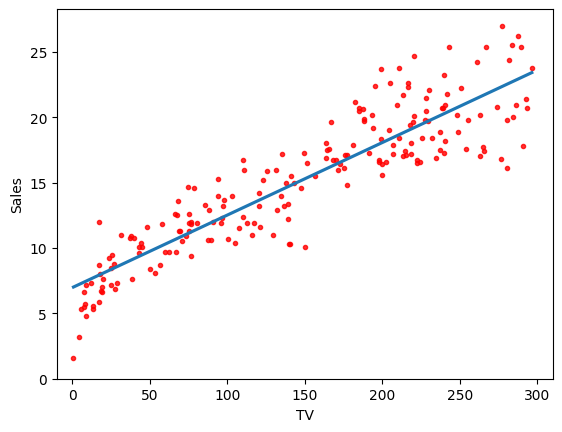

In [ ]:
sns.regplot(x=data.TV, y=data.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

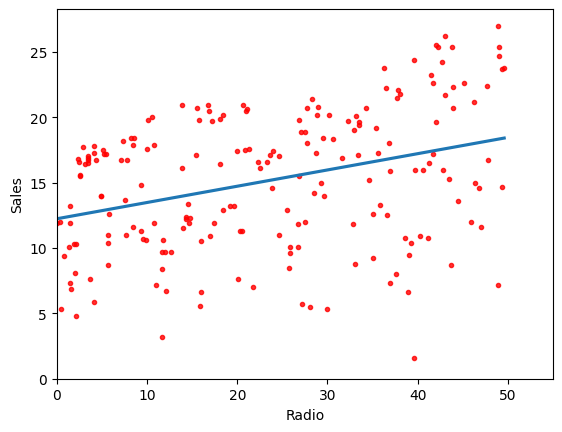

In [ ]:
sns.regplot(x=data.Radio, y=data.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(0,55)
plt.ylim(bottom=0)
plt.show()

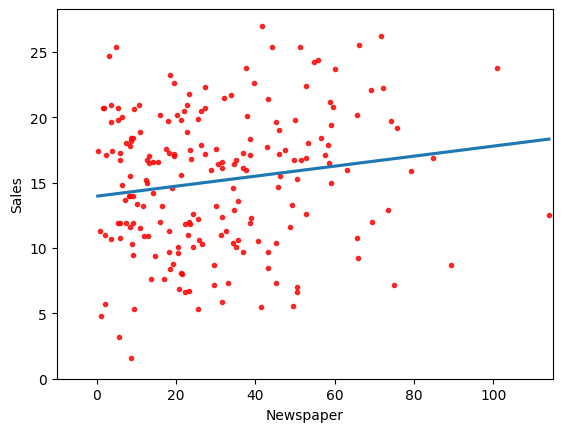

In [ ]:
sns.regplot(x=data.Newspaper, y=data.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,115)
plt.ylim(bottom=0)
plt.show()

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x=scale(data.TV,with_mean=True,with_std=True).reshape(-1,1)
y=data.Sales

In [ ]:
x[0:5]

array([[ 0.96985227],
       [-1.19737623],
       [-1.51615499],
       [ 0.05204968],
       [ 0.3941822 ]])

In [ ]:
x.mean()

1.2212453270876723e-16

In [ ]:
x.std()

1.0

# Linear Regression Using sklearn (scaled data)

In [ ]:
import sklearn.linear_model as sk_lm

In [ ]:
reg=sk_lm.LinearRegression()

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.intercept_

15.130500000000001

In [ ]:
reg.coef_

array([4.74996588])

In [ ]:
min_rss = np.sum((reg.intercept_+reg.coef_*x - y.values.reshape(-1,1))**2)
min_rss

1043.5487795590257

# Regression Using sklearn (Unscaled)

In [ ]:
reg=sk_lm.LinearRegression()

In [ ]:
x = data.TV.values.reshape(-1,1)
y = data.Sales

In [ ]:
reg.fit(x,y)

LinearRegression()

In [ ]:
reg.intercept_

6.974821488229891

In [ ]:
reg.coef_

array([0.05546477])

In [ ]:
min_rss=np.sum((reg.intercept_+reg.coef_*x-y.values.reshape(-1,1))**2)
min_rss

1043.5487795590257

In [ ]:
mse=min_rss/len(y)
mse

5.2177438977951285

# MSE, R-Sq Using Sklearn

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
Sales_pred = reg.predict(x)

In [ ]:
r2_score(y, Sales_pred)

0.8121757029987414

In [ ]:
mean_squared_error(y, Sales_pred)

5.2177438977951285

# Regression Summary using statsmodels

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
est = smf.ols('Sales ~ TV', data).fit()

In [ ]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           7.93e-74
Time:                        05:37:30   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regression RSS, MSE Using statsmodels

In [ ]:
est.params

Intercept    6.97
TV           0.06
dtype: float64

## RSS

In [ ]:
((data.Sales - (est.params[0] + est.params[1] * data.TV))**2).sum()

1043.5487795590257

## MSE


In [ ]:
((data.Sales - (est.params[0] + est.params[1]*data.TV))**2).sum()/len(data.Sales)

# Multiple Linear Regression

In [ ]:
est = smf.ols('Sales ~ Radio', data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.2357,0.653,18.724,0.000,10.947,13.524
Radio,0.1244,0.024,5.251,0.000,0.078,0.171


In [ ]:
est = smf.ols('Sales ~ Newspaper', data).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13.9595,0.638,21.870,0.000,12.701,15.218
Newspaper,0.0383,0.017,2.251,0.025,0.005,0.072


In [ ]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 30 Jan 2024   Prob (F-statistic):           8.13e-99
Time:                        05:43:28   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00
